# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://universe.roboflow.com/university-of-fallujah/detectionyolo_v7/)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)]()
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/Mohammed20201991)

YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Important to  Use GPU Acceleration

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Jan 12 00:01:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Ultralytics YOLOv8.0.4 🚀 Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/78.2 GB disk)


In [4]:
# Git clone

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e ultralytics

# from IPython import display
# display.clear_output()
# !yolo mode=checks

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

## CLI Basics 

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/moh.jpeg'

/content
Ultralytics YOLOv8.0.4 🚀 Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
100% 6.24M/6.24M [00:00<00:00, 9.73MB/s]

Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /content/moh.jpeg: 480x640 1 person, 13.7ms
Speed: 0.5ms pre-process, 13.7ms inference, 18.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [7]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/Mashawee.jpeg'

Ultralytics YOLOv8.0.4 🚀 Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /content/Mashawee.jpeg: 640x480 2 persons, 1 cup, 26.4ms
Speed: 0.7ms pre-process, 26.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


/content


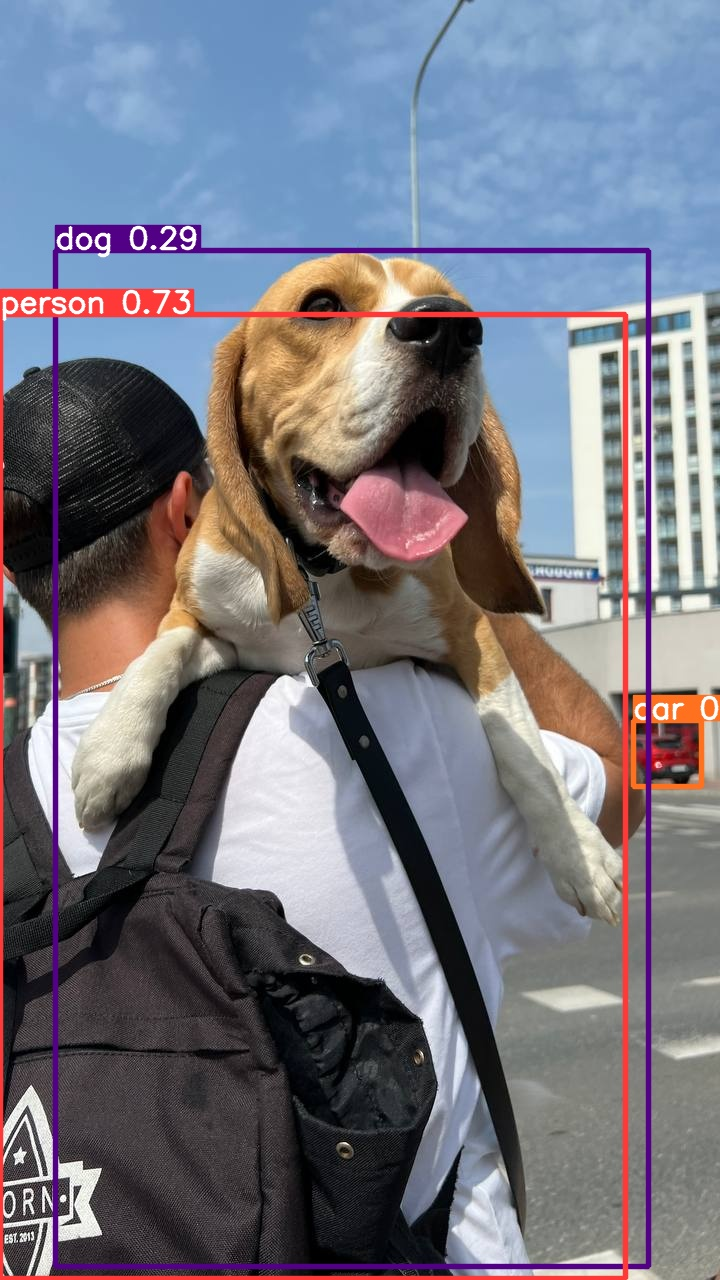

In [9]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

/content


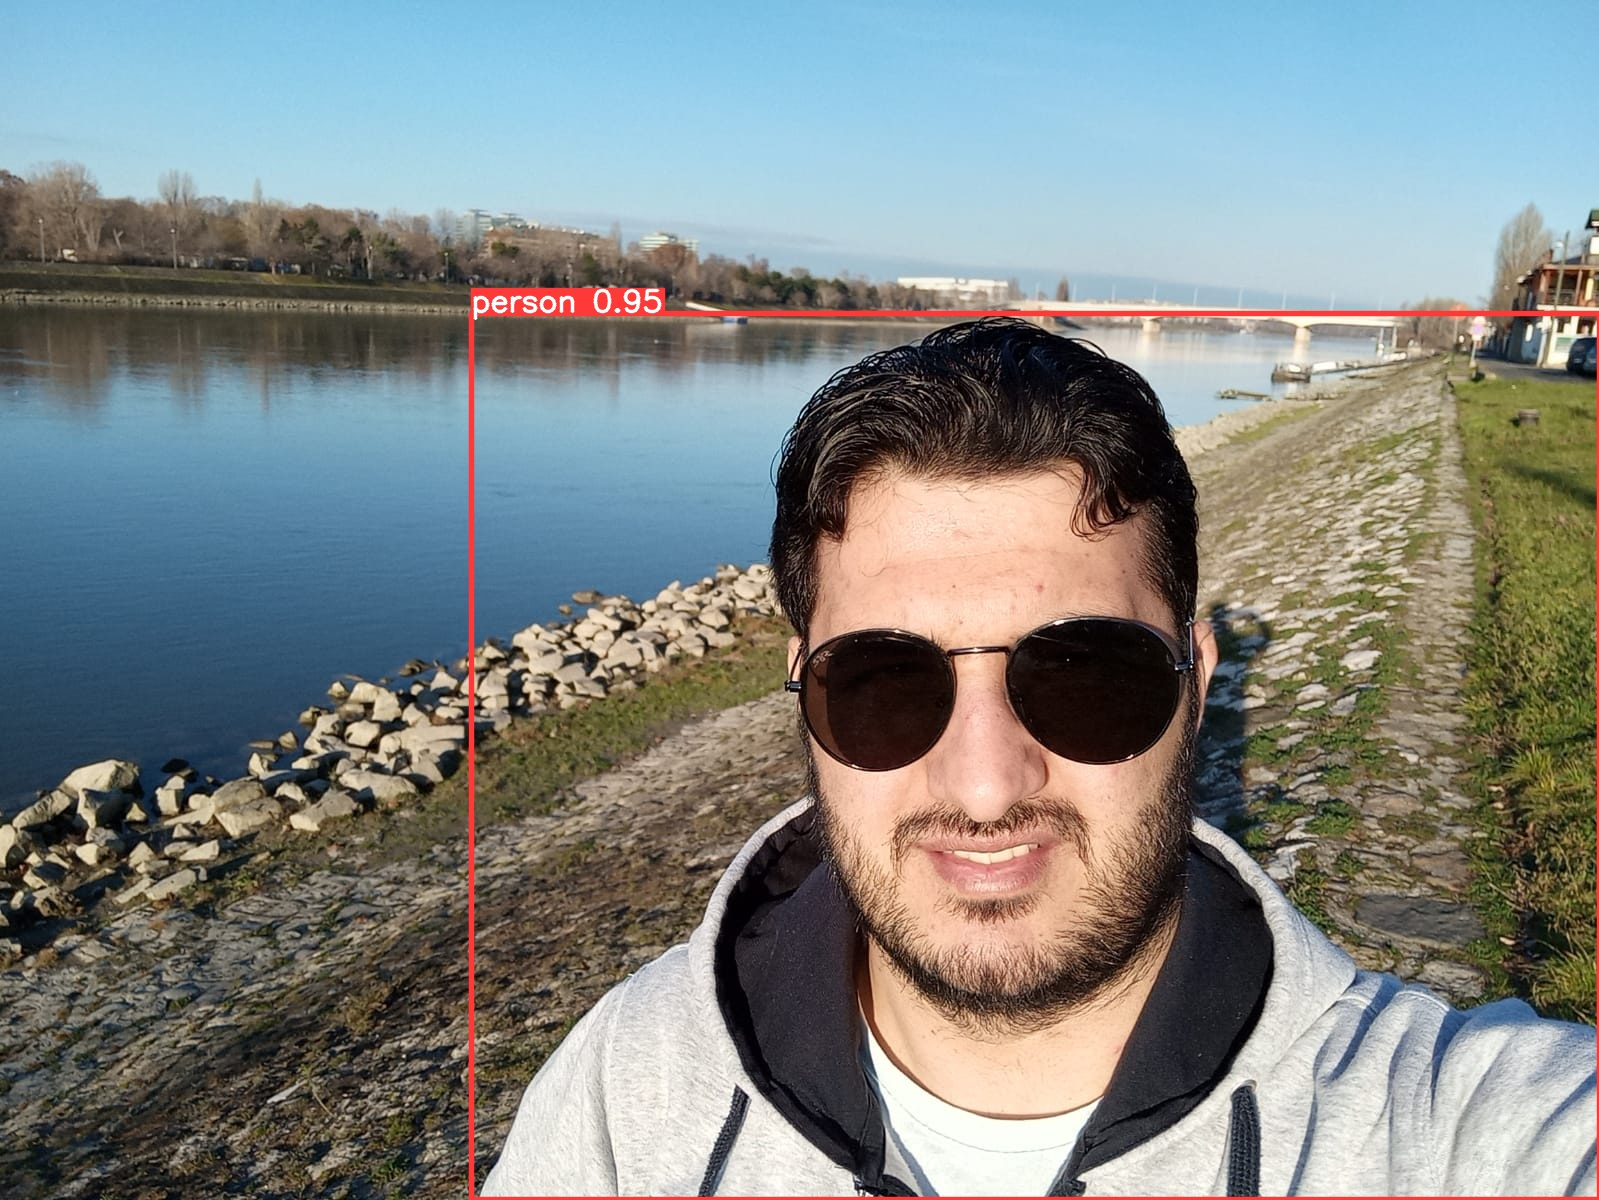

In [8]:
%cd {HOME}
Image(filename='runs/detect/predict/moh.jpeg', height=600)

/content


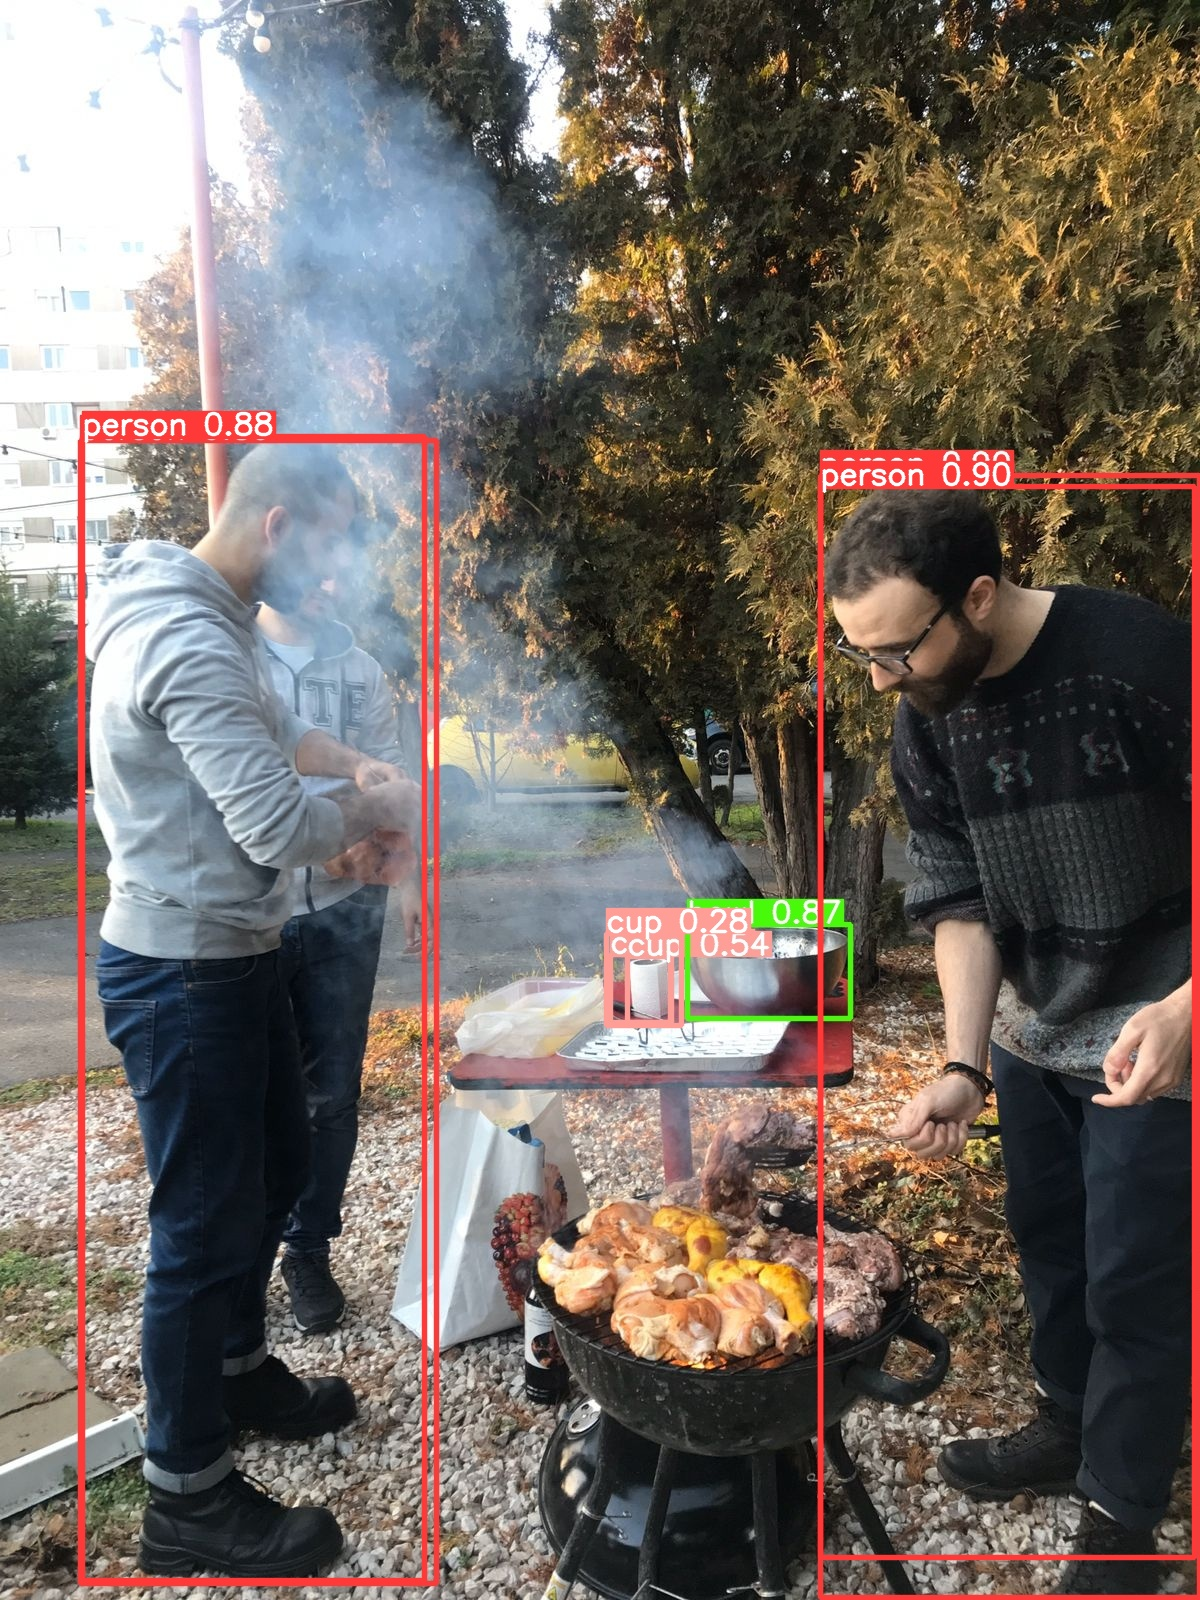

In [10]:
%cd {HOME}
Image(filename='runs/detect/predict2/Mashawee.jpeg', height=600)

### 🐍 Python SDK

In [11]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/Mashawee.jpeg', conf=0.25)

Ultralytics YOLOv8.0.4 🚀 Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


In [12]:
 %cd {HOME}

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="") #
project = rf.workspace("university-of-fallujah").project("detectionyolo_v7")
dataset = project.version(2).download("yolov5")

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to DetectionYolo_v7-2 in yolov5pytorch:: 100%|██████████| 602/602 [00:00<00:00, 1357.67it/s]


## Custom Training

In [13]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800

/content
100% 21.5M/21.5M [00:04<00:00, 5.62MB/s]

Ultralytics YOLOv8.0.4 🚀 Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/DetectionYolo_v7-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, s

In [14]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1170.jpg
confusion_matrix.png				    train_batch1171.jpg
events.out.tfevents.1673481942.f5e454e5d8b9.1523.0  train_batch1172.jpg
F1_curve.png					    train_batch1.jpg
P_curve.png					    train_batch2.jpg
PR_curve.png					    val_batch0_labels.jpg
predictions.json				    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    weights
train_batch0.jpg


/content


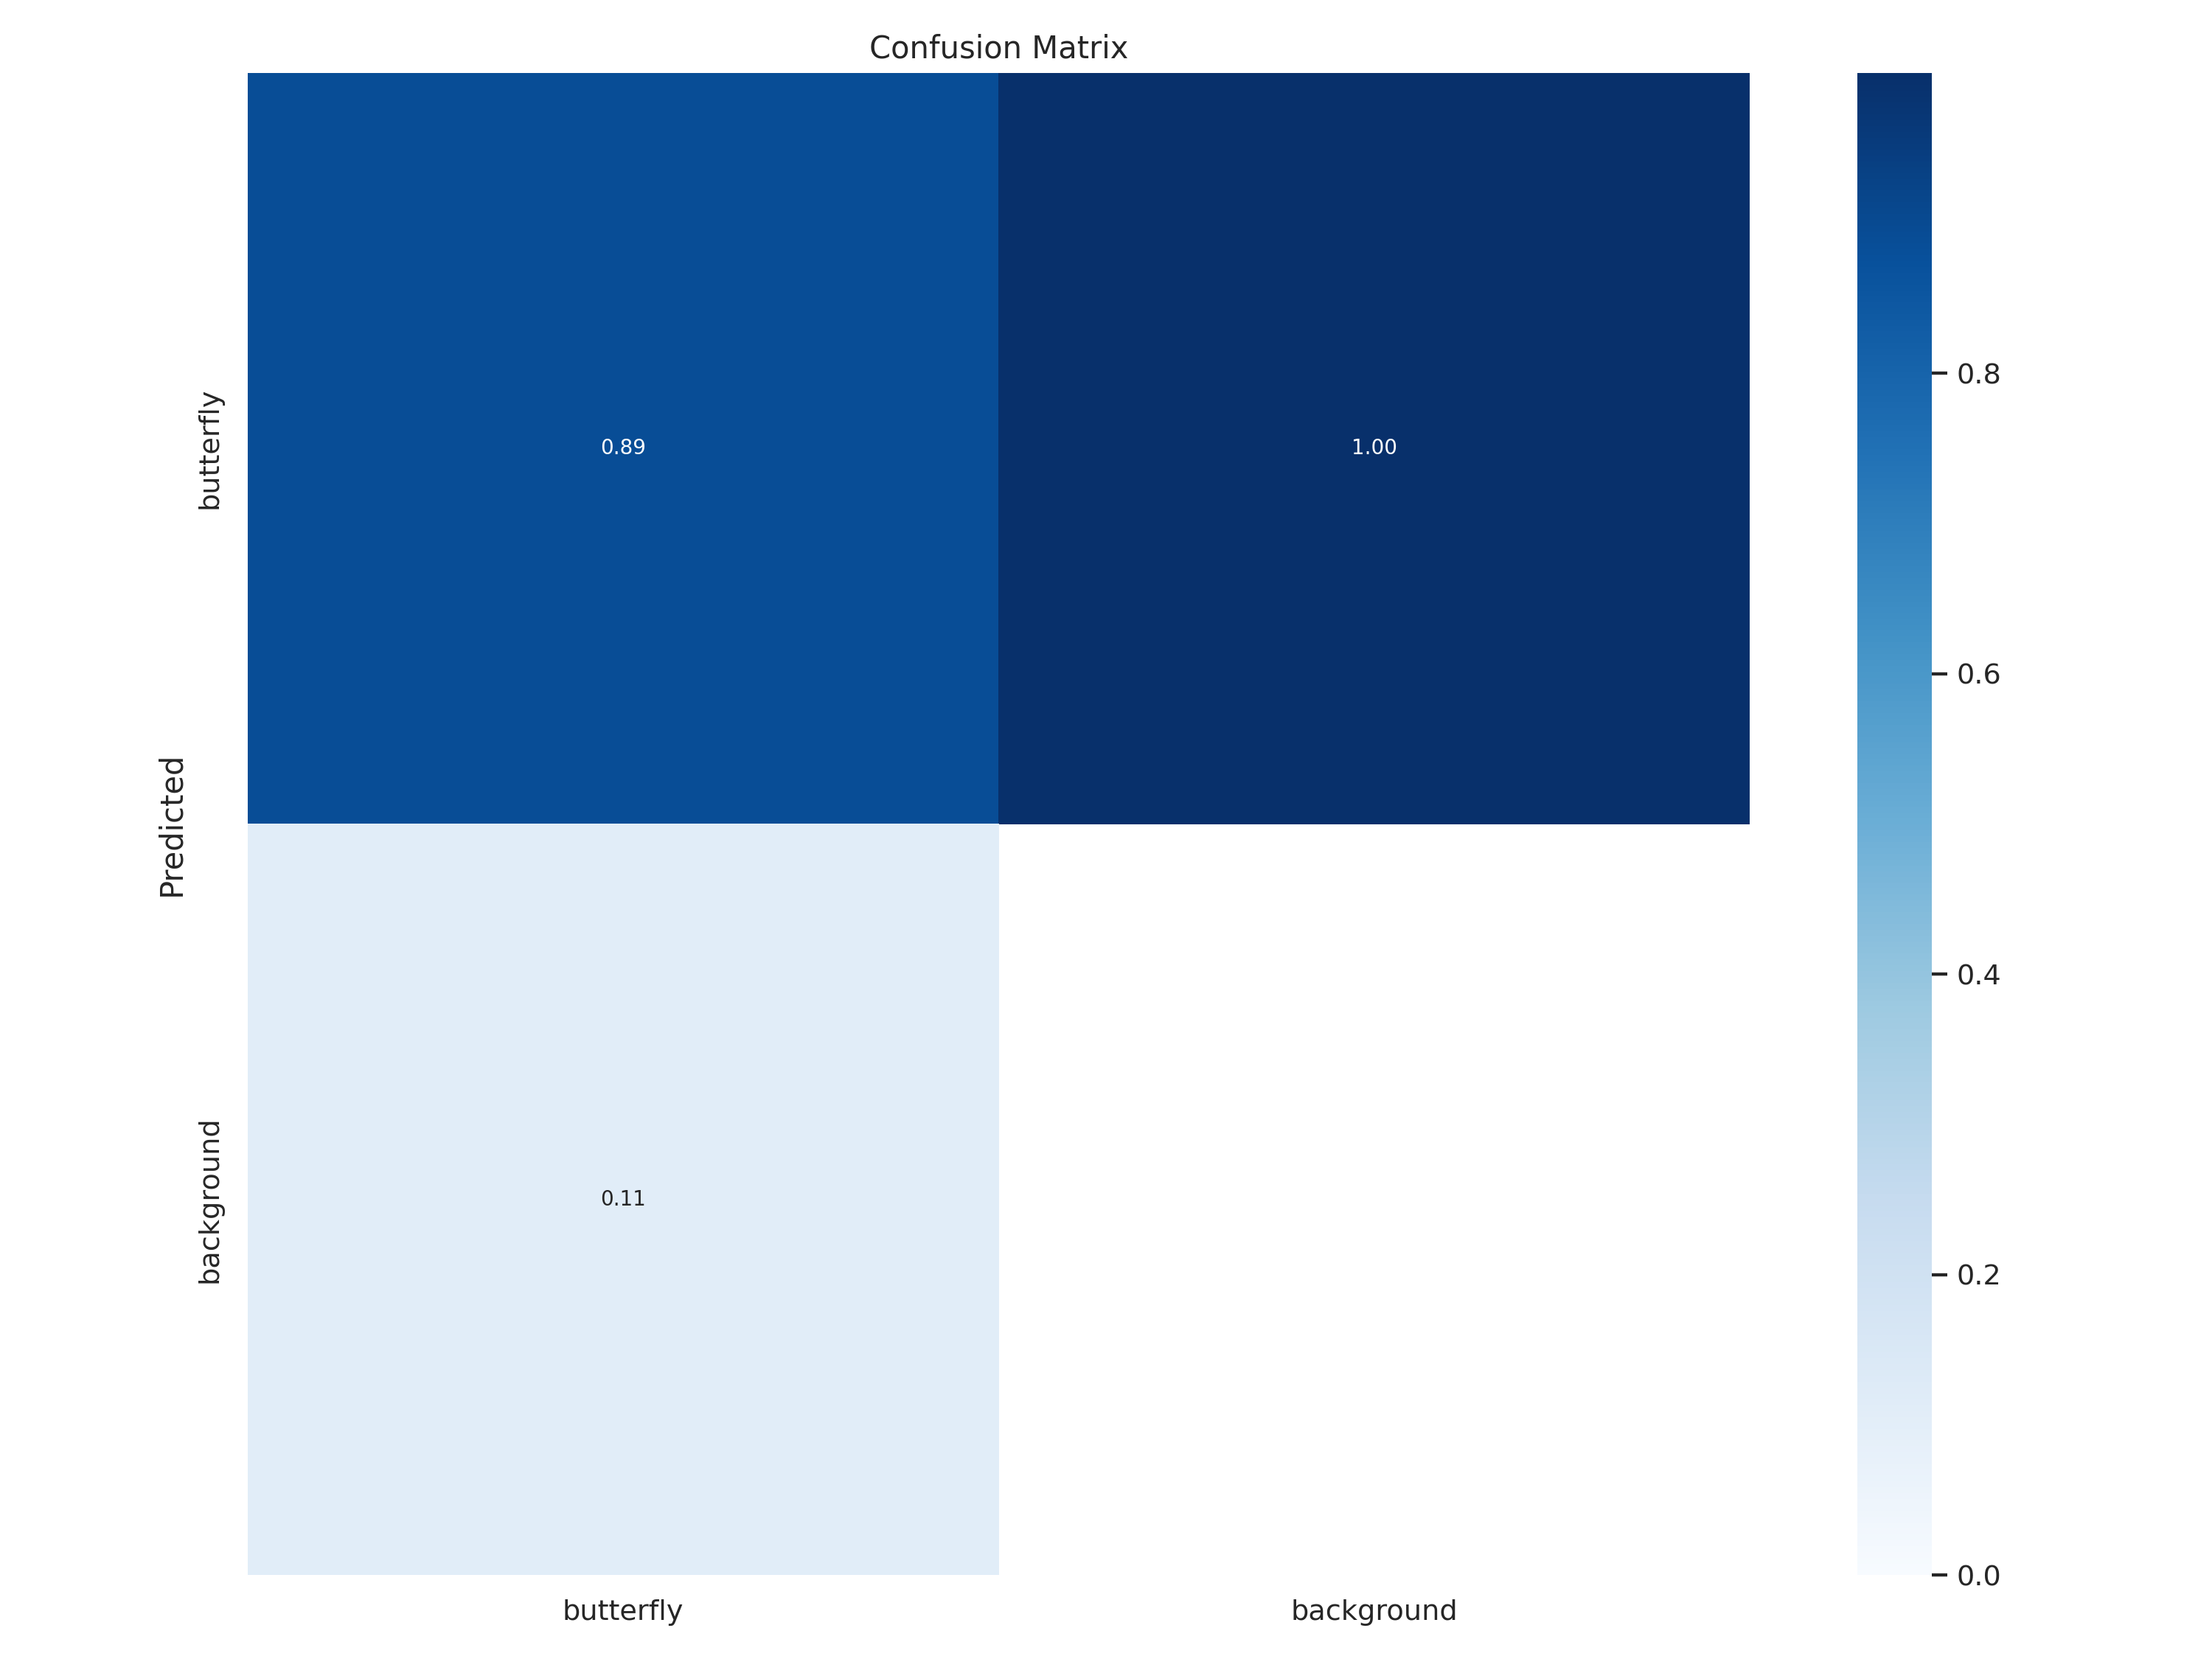

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


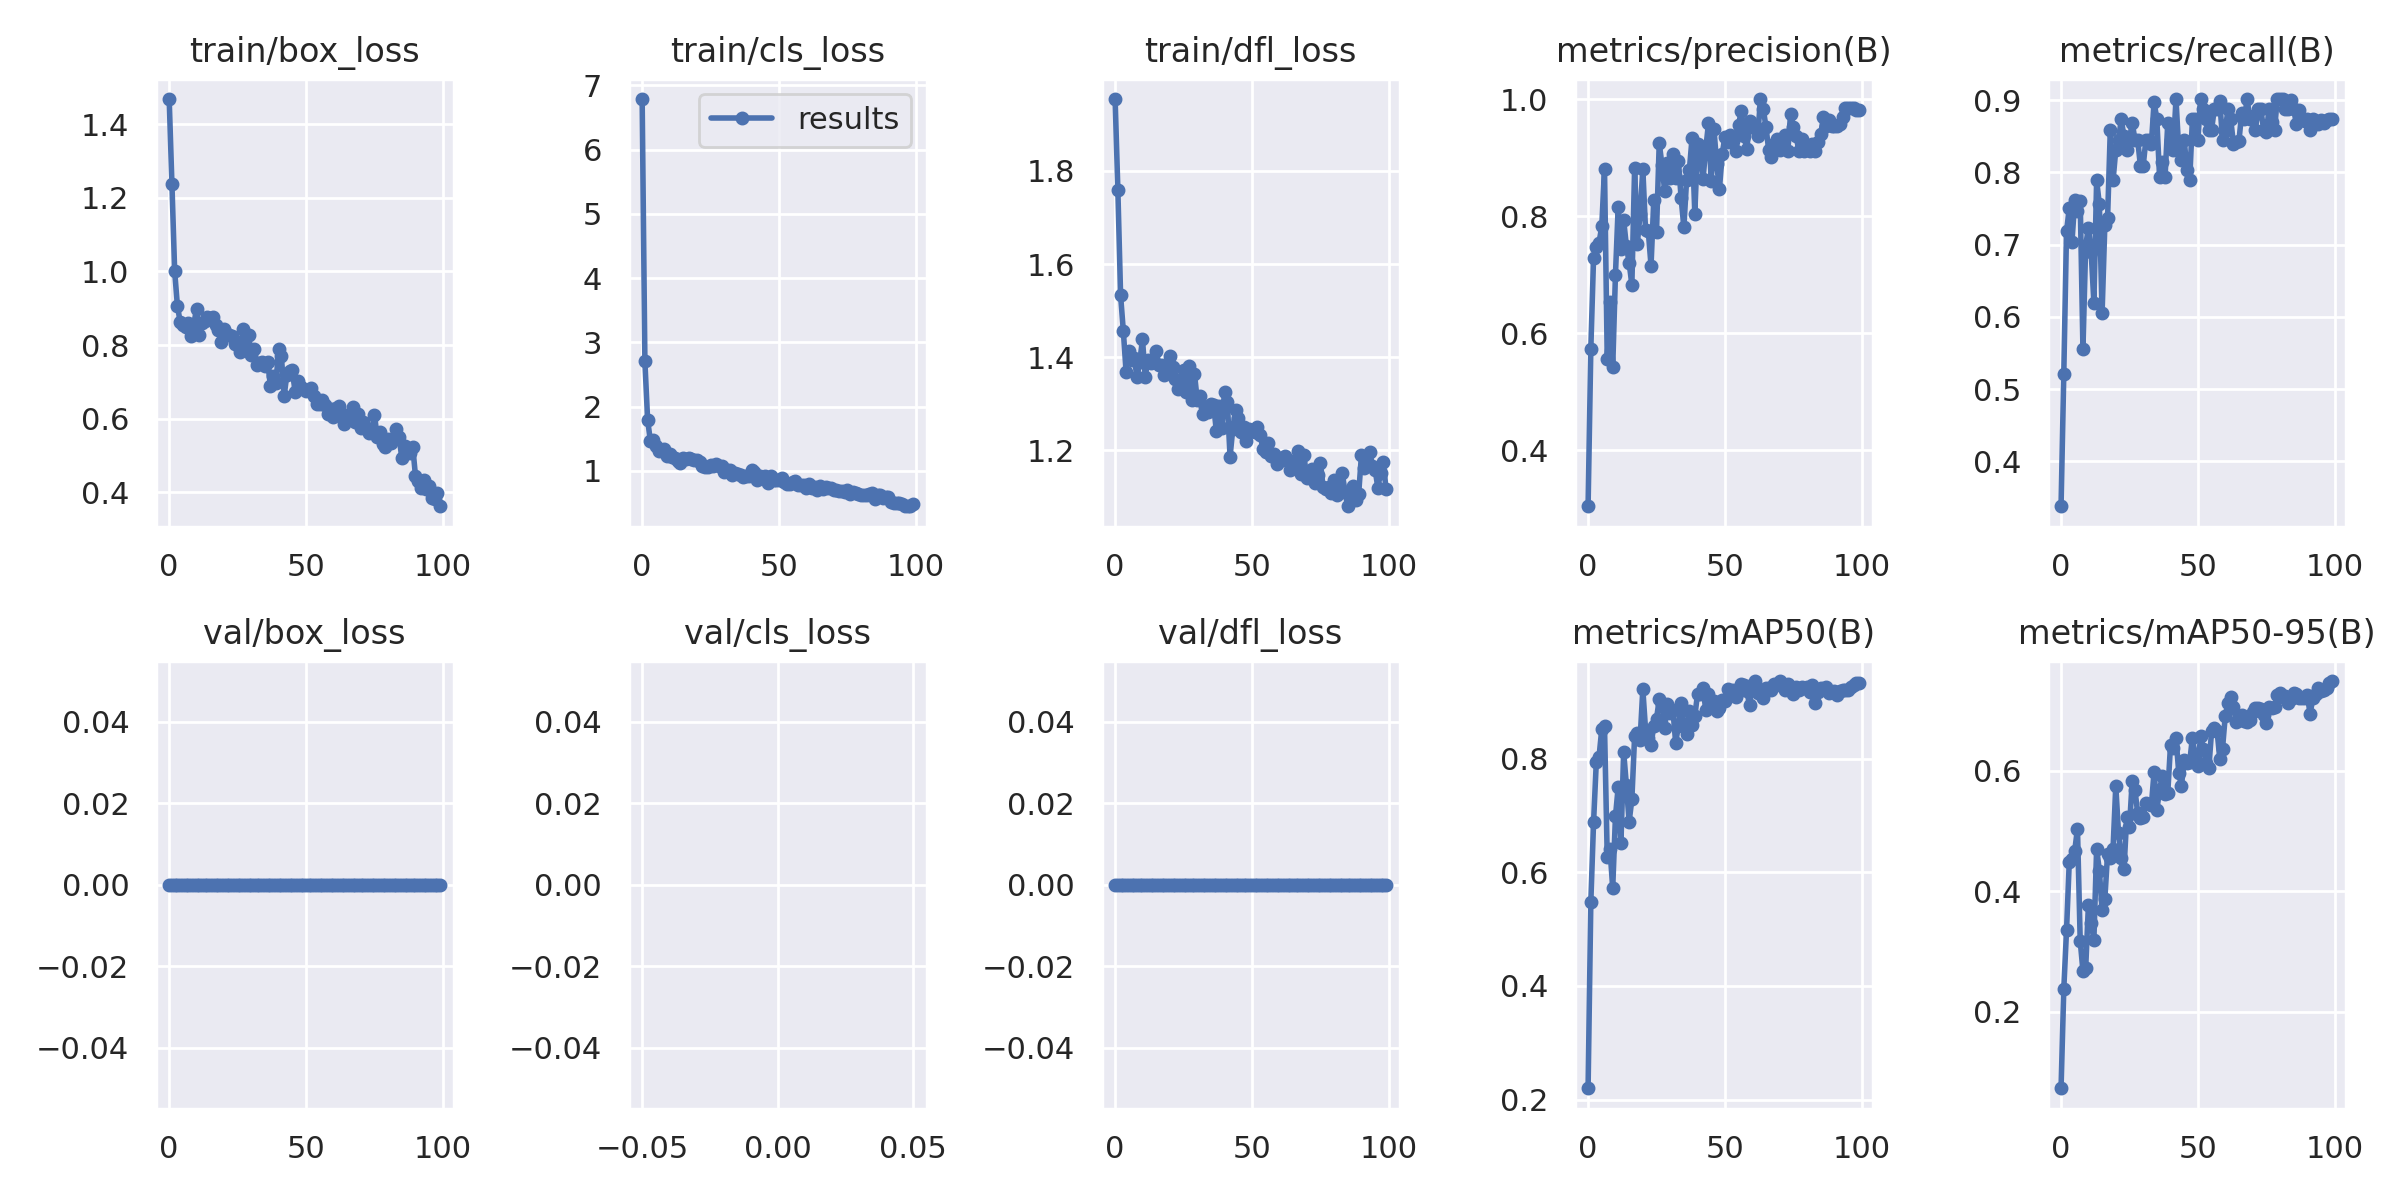

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


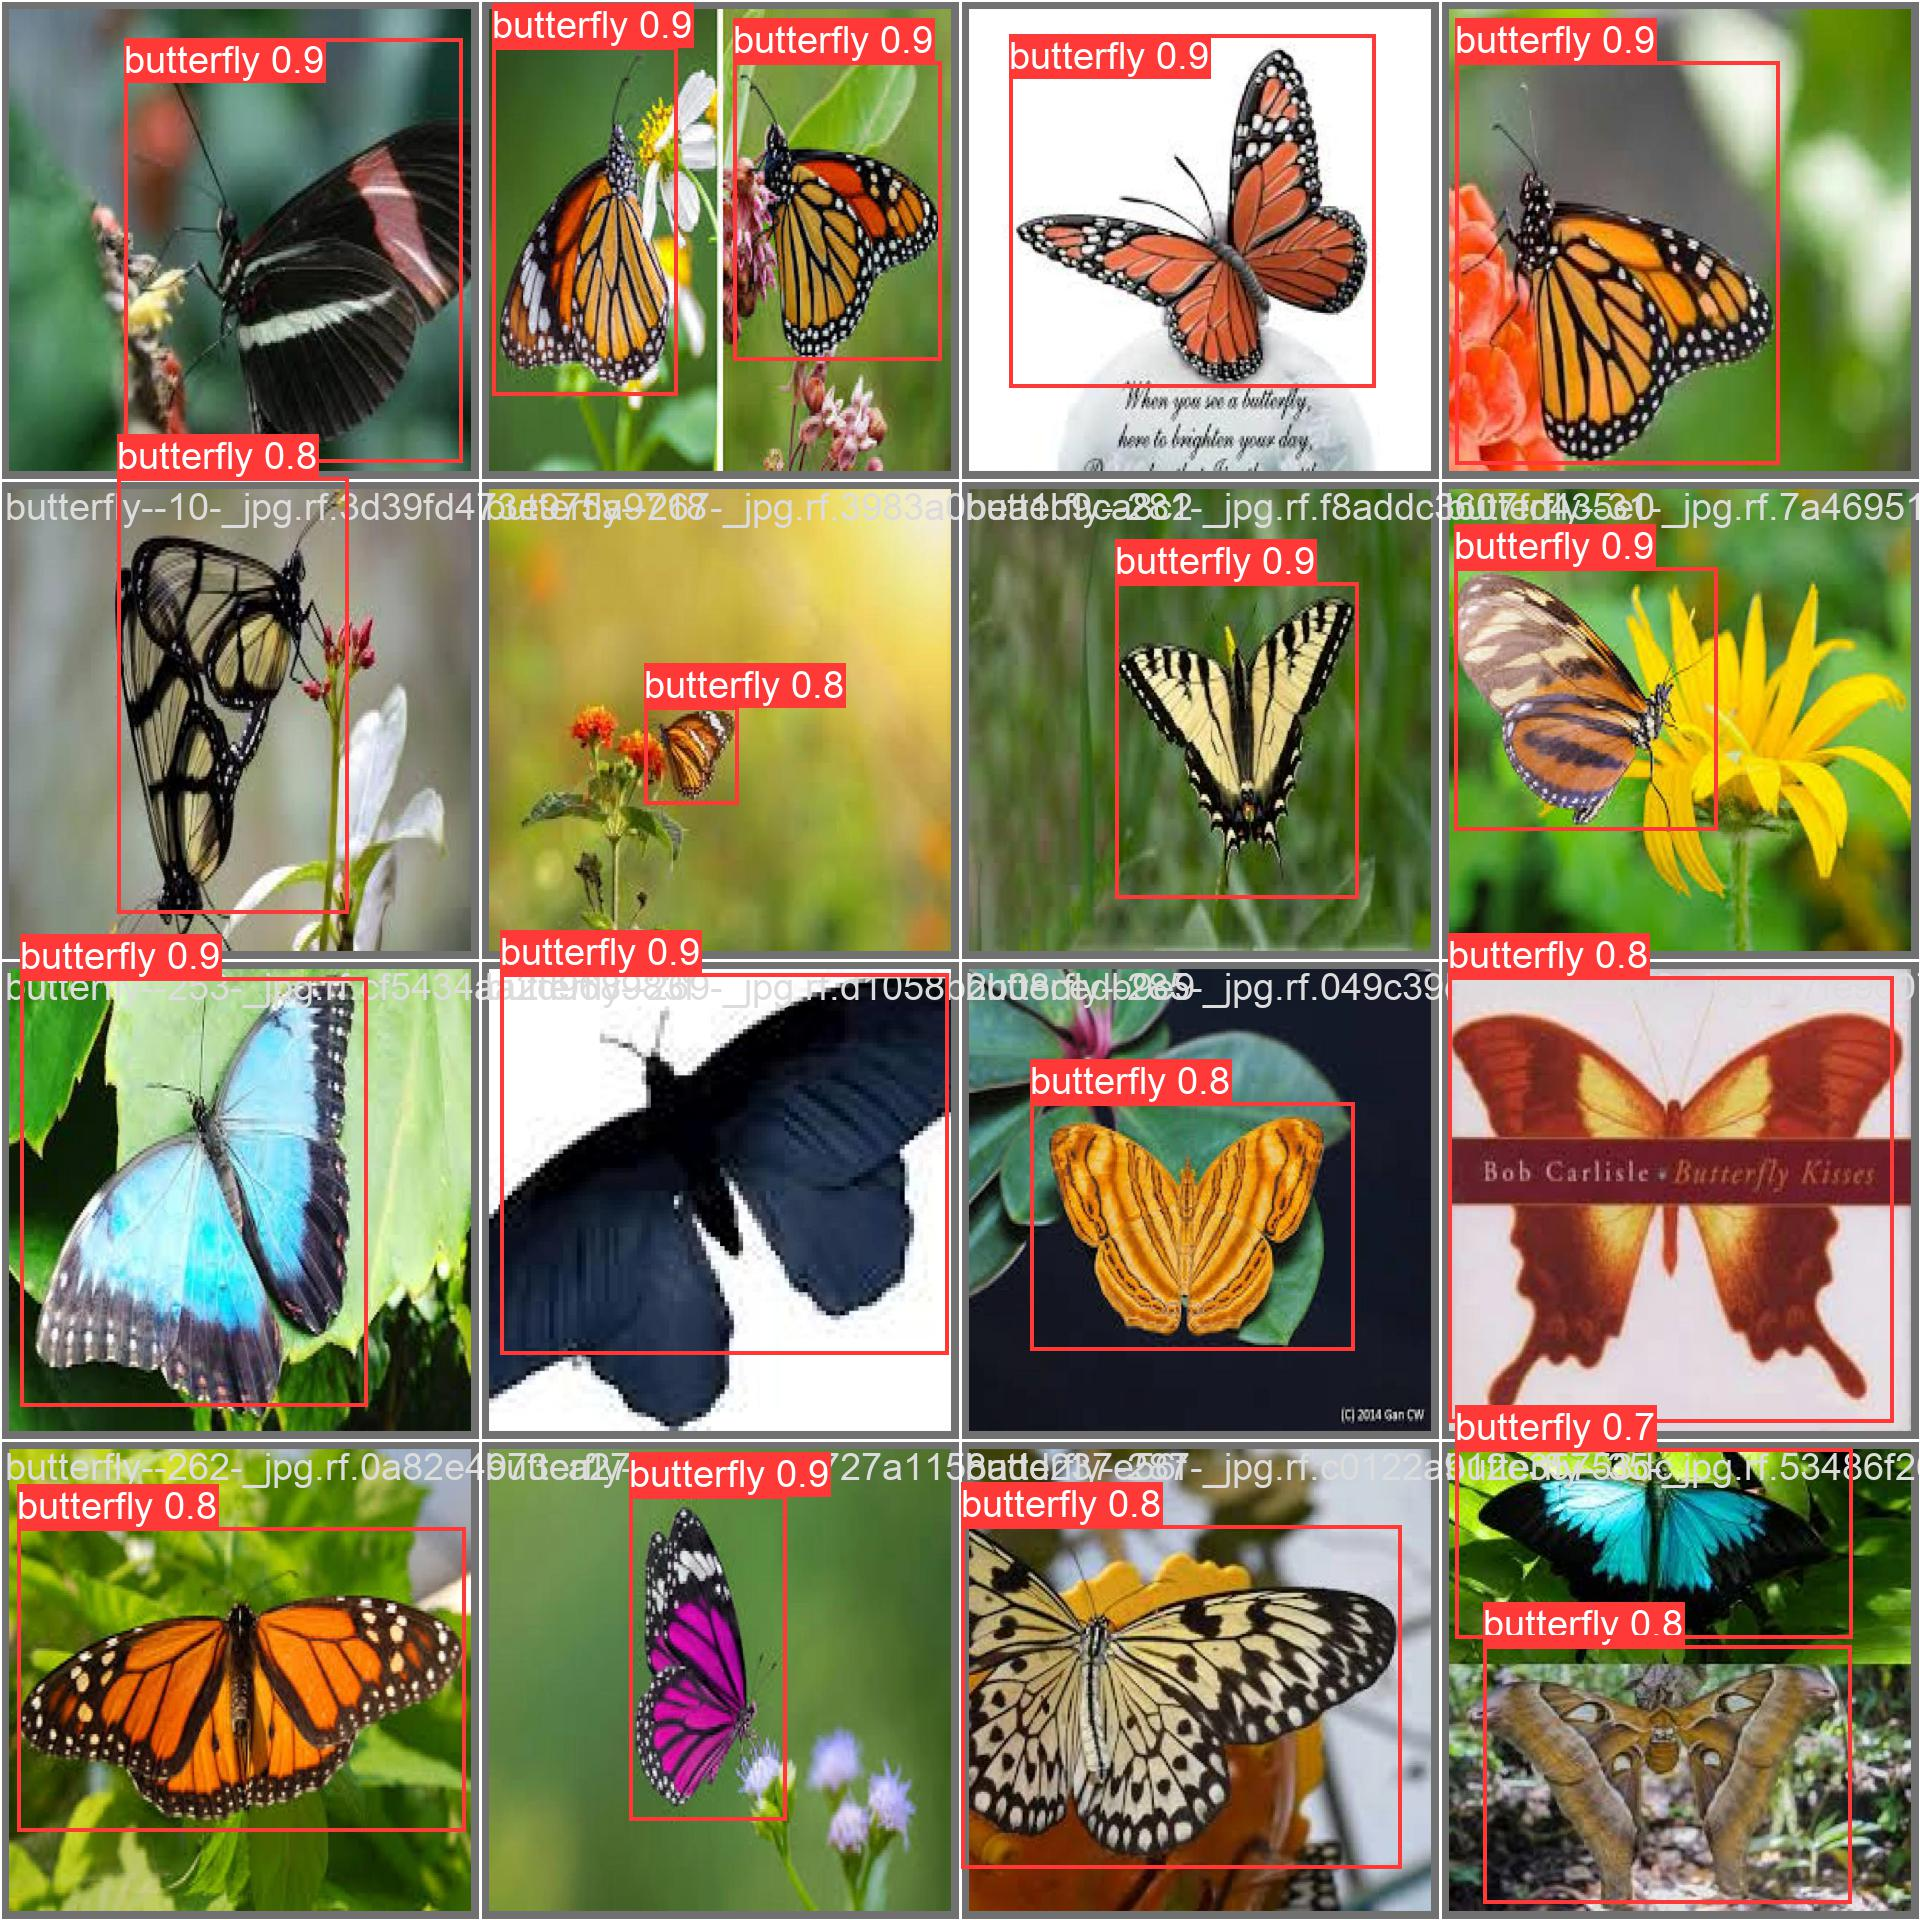

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.4 🚀 Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/DetectionYolo_v7-2/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.18it/s]
                   all         59         71       0.94      0.882      0.929      0.783
Speed: 7.2ms pre-process, 10.8ms inference, 0.0ms loss, 3.2ms post-process per image


## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.4 🚀 Python-3.8.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/30 /content/DetectionYolo_v7-2/test/images/butterfly--115-_jpg.rf.2d03bd76a5fbc5f9ac3130ece0934249.jpg: 640x640 1 butterfly, 17.1ms
image 2/30 /content/DetectionYolo_v7-2/test/images/butterfly--132-_jpg.rf.cc6ff92ab7c8108cbed4cbbb09c20806.jpg: 640x640 1 butterfly, 17.1ms
image 3/30 /content/DetectionYolo_v7-2/test/images/butterfly--140-_jpg.rf.b613bf002fac81a1153ebc8c04b0a2de.jpg: 640x640 1 butterfly, 17.1ms
image 4/30 /content/DetectionYolo_v7-2/test/images/butterfly--142-_jpg.rf.d6198e57ea0bfa1e2f410631014d9ae0.jpg: 640x640 1 butterfly, 17.1ms
image 5/30 /content/DetectionYolo_v7-2/test/images/butterfly--147-_jpg.rf.83bd483658474a813f8b2e07ba5032cd.jpg: 640x640 1 butterfly, 15.8ms
image 6/30 /content/DetectionYolo_v7-2/test/images/butterfly--155-_jpg.rf.c58adb6d09a35e1621bddf44d4ab1dda.jpg: 64

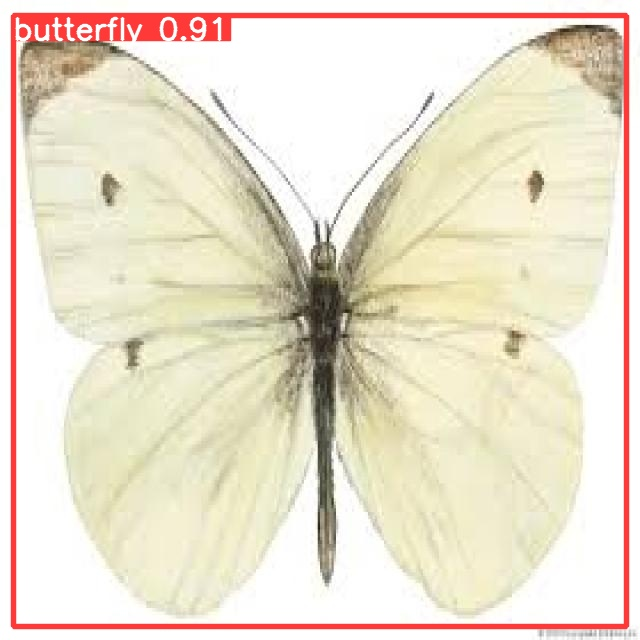

In [24]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [27]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
